# TASK 05 : Fraud Detection

Name : Muskan Giri

Domain : Data Analytics

Oasis Infobyte Virtual Internship

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
normal = data[data.Class == 0]
scam = data[data.Class == 1]

In [5]:
scam.Class.value_counts()

Class
1    492
Name: count, dtype: int64

In [6]:
raw_data = pd.read_csv('creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


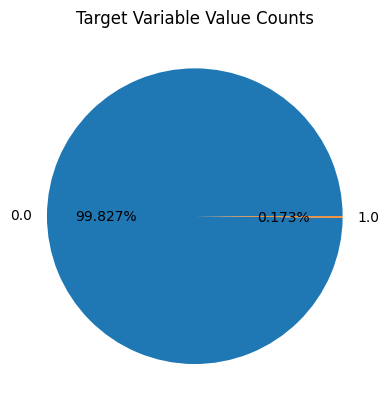

In [8]:
labels = big_raw_data.Class.unique()
sizes = big_raw_data.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

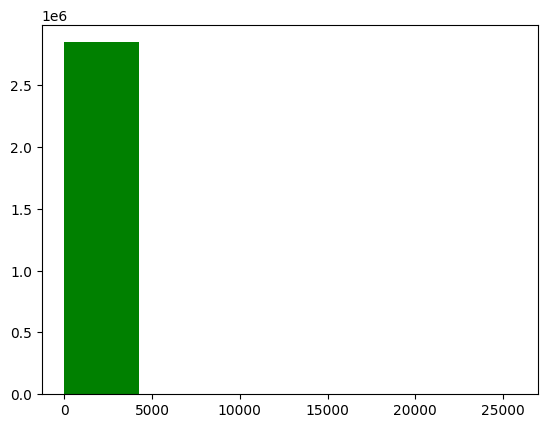

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [9]:
plt.hist(big_raw_data.Amount.values,6,histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

In [10]:
new_data = normal.sample(n=492)
scam

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [11]:
new_data = pd.concat([new_data,scam],axis=0)

In [12]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130666,79404.0,-0.695529,-0.137410,0.773704,1.512639,1.005173,-0.604163,0.038637,-0.055208,-0.002024,...,0.045353,0.516006,-0.021632,0.142774,-0.971163,-0.452797,0.277328,0.106094,50.23,0
199409,132948.0,-0.720766,1.228872,-0.227203,-0.600410,0.145017,-1.040492,0.651642,0.118632,-0.031226,...,-0.178873,-0.546309,0.207074,-0.087544,-0.478969,0.115121,-0.262187,0.023606,9.99,0
90103,62865.0,-0.817735,0.793238,0.365173,-2.623895,-0.403762,-0.561723,-0.044210,-0.587514,1.521684,...,0.816499,0.161116,-0.289565,-0.377917,0.668308,-0.665941,-0.111445,-0.041977,9.95,0
40746,40380.0,-0.466343,0.945953,1.656308,-0.092885,-0.187671,-0.712915,0.542120,0.117575,-0.536244,...,-0.174191,-0.515867,-0.003609,0.492688,-0.281858,0.044096,0.256786,0.110833,0.89,0
206322,136164.0,-0.936640,1.348385,-0.195224,-0.973036,0.157059,-1.117717,1.167375,0.048895,-0.148887,...,-0.029590,-0.047311,-0.073958,-0.001955,-0.109140,-0.138721,-0.015554,0.138012,49.00,0


In [13]:
new_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88425.794715,-2.321672,1.796002,-3.568644,2.274759,-1.604580,-0.718240,-2.746897,0.289050,-1.259150,...,0.338969,0.027707,-0.015513,-0.055407,0.036192,0.029366,0.085622,0.025395,107.860091,0.500000
std,48627.066144,5.589234,3.750958,6.198491,3.202442,4.185300,1.688617,5.872079,4.849885,2.364746,...,2.785811,1.154982,1.168344,0.547324,0.668279,0.494186,1.026625,0.449193,262.050560,0.500254
min,406.000000,-30.552380,-20.320505,-31.103685,-4.529023,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.511259,-7.263482,-3.713108,0.000000,0.000000
25%,45293.000000,-2.834483,-0.116444,-5.120349,-0.020115,-1.838209,-1.575691,-3.078361,-0.233469,-2.279453,...,-0.157918,-0.504809,-0.229495,-0.388661,-0.306223,-0.285175,-0.070084,-0.059461,1.262500,0.000000
50%,82154.000000,-0.691336,0.931839,-1.494405,1.350911,-0.397201,-0.633371,-0.608737,0.123254,-0.709993,...,0.144753,0.045695,-0.035064,0.003861,0.068219,-0.045155,0.045818,0.028082,18.465000,0.500000
75%,135150.250000,1.121910,2.798885,0.270487,4.207981,0.422399,0.056971,0.264567,0.831049,0.198085,...,0.648533,0.593493,0.192682,0.379461,0.405866,0.320198,0.457194,0.209136,99.990000,1.000000
max,172564.000000,2.366096,22.057729,3.141201,12.114672,11.095089,6.474115,6.881774,20.007208,7.929051,...,27.202839,8.361985,5.466230,1.099509,2.208209,2.745261,3.441583,1.779364,4080.300000,1.000000


In [14]:
new_data.groupby("Class").mean()
X = new_data.drop("Class",axis=1)
Y = new_data["Class"]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
pred = model.predict(x_test)

In [19]:
acc = accuracy_score(pred,y_test)

In [20]:
print(acc)

0.949238578680203


In [21]:
pred = model.predict(x_test)
acc = accuracy_score(pred,y_test)
new_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.252438,-0.236458,0.147917,-0.226780,0.296103,0.137322,0.223244,-0.139559,0.172206,...,-0.063544,0.120563,0.064304,-0.006256,-0.179440,-0.052927,-0.120912,0.001014,0.011208,-0.157996
V1,0.252438,1.000000,-0.771367,0.878014,-0.617039,0.856299,0.322153,0.871068,-0.084258,0.641208,...,0.022632,-0.033254,-0.057463,-0.071603,-0.086568,0.057691,0.168063,0.184311,-0.038396,-0.438615
V2,-0.236458,-0.771367,1.000000,-0.836169,0.661737,-0.782324,-0.295019,-0.840992,-0.014489,-0.677143,...,0.049528,-0.025544,0.132195,0.006378,0.090143,-0.019186,-0.168292,0.013366,-0.252579,0.487530
V3,0.147917,0.878014,-0.836169,1.000000,-0.769404,0.851915,0.471601,0.887620,-0.173964,0.756135,...,0.027116,-0.052361,-0.034351,0.016154,-0.079840,-0.015266,0.095169,0.110575,-0.010193,-0.559233
V4,-0.226780,-0.617039,0.661737,-0.769404,1.000000,-0.578136,-0.434846,-0.710185,0.102556,-0.783336,...,-0.021095,0.109324,0.029209,-0.068851,-0.039089,0.147717,-0.000415,-0.041628,0.006366,0.708341
V5,0.296103,0.856299,-0.782324,0.851915,-0.578136,1.000000,0.301810,0.841810,-0.208961,0.656814,...,0.040844,-0.085966,-0.083873,-0.131338,-0.079024,0.058059,0.185503,0.159689,-0.107612,-0.369730
V6,0.137322,0.322153,-0.295019,0.471601,-0.434846,0.301810,1.000000,0.291304,-0.586335,0.372790,...,0.024714,0.021541,0.332045,-0.046885,-0.139724,-0.021574,-0.168195,-0.054864,0.177764,-0.402603
V7,0.223244,0.871068,-0.840992,0.887620,-0.710185,0.841810,0.291304,1.000000,0.081994,0.757994,...,0.037743,-0.108693,-0.088465,-0.042778,0.063482,0.032088,0.228139,0.115288,0.137488,-0.480795
V8,-0.139559,-0.084258,-0.014489,-0.173964,0.102556,-0.208961,-0.586335,0.081994,1.000000,-0.079155,...,-0.109213,0.026951,-0.423798,0.070773,0.230390,0.045509,0.287344,0.004049,0.016425,0.058090
V9,0.172206,0.641208,-0.677143,0.756135,-0.783336,0.656814,0.372790,0.757994,-0.079155,1.000000,...,0.140250,-0.229657,-0.040165,0.010173,0.006983,-0.109676,0.121591,0.081760,0.011134,-0.559318


In [22]:
def pred(data):
    data = np.asarray(data).reshape(1,-1)
    predd = model.predict(data)
    if predd == 0:
        print("it's a normal card")
    else:
        print("it's a scam card")

In [32]:
new_data = [4, 1.22965763450793, 0.141003507049326, 0.0453707735899449, 1.20261273673594, 
            0.191880988597645, 0.272708122899098, -0.00515900288250983, 0.0812129398830894, 
            0.464959994783886, -0.0992543211289237, -1.41690724314928, -0.153825826253651, 
            -0.75106271556262, 0.16737196252175, 0.0501435942254188, -0.443586797916727, 
            0.00282051247234708, -0.61198733994012, -0.0455750446637976, -0.21963255278686, 
            -0.167716265815783, -0.270709726172363, -0.154103786809305, -0.780055415004671, 
            0.75013693580659, -0.257236845917139, 0.0345074297438413, 0.00516776890624916, 4.99]

pred(new_data)

it's a scam card
